# 卷积神经网络
卷积神经网络（Convolutional Neural Network，CNN）是一种深度学习神经网络，专门用于处理具有网格结构的数据，如图像和视频。它的主要特点是包含卷积层，池化层和全连接层，以有效地捕捉图像中的特征。

举个例子，假设你想训练一个CNN来识别猫和狗的图像。CNN的卷积层将扫描图像的小区域，并检测边缘、纹理和颜色等特征。池化层将减小图像的尺寸，同时保留重要信息。最后，全连接层将这些特征映射到猫或狗的分类结果。通过多次迭代和训练，CNN可以逐渐提高其准确性，使其能够准确识别猫和狗的图像。

# CNN的三个层
卷积神经网络（CNN）通常包含三种主要类型的层，它们分别是：

1. 卷积层（Convolutional Layer）：卷积层是CNN的核心组成部分。它使用卷积操作来检测输入数据中的特征，例如边缘、纹理和模式。每个卷积层由多个过滤器（卷积核）组成，这些过滤器在输入数据上滑动，执行卷积运算，生成特征图。卷积操作允许CNN有效地捕捉图像中的空间局部信息。

2. 池化层（Pooling Layer）：池化层用于减小特征图的尺寸，同时保留重要信息。最常见的池化操作是最大池化，其中在每个池化窗口内选取最大值，从而减小数据的维度。这有助于降低计算复杂性，提高网络的平移不变性，并减少过拟合。

3. 全连接层（Fully Connected Layer）：全连接层是传统神经网络的一部分，它将前一层的所有神经元与当前层的每个神经元相连接。这一层通常出现在CNN的末尾，用于将高级特征映射到最终的分类输出。在图像分类任务中，全连接层通常包括一个输出层，其中每个神经元对应一个可能的类别，以输出类别概率分布。

这三种层的组合使CNN能够有效地学习和提取图像中的特征，并在各种计算机视觉任务中表现出色。
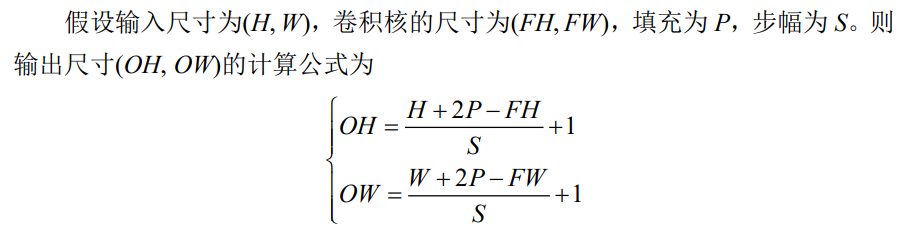

In [2]:
# 用pytorch代码实现一个CNN和MNIST数据集的实例，代码中包含损失函数的计算，权重的计算，输出结果语句，输出结果中包含损失函数和权重，在最后创建一个随机数据进行测试。
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F  # 使用 relu() 作为激活函数
import random

In [9]:
# 定义一个简单的CNN模型
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 32 * 12 * 12)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [10]:
# 加载MNIST数据集并进行数据预处理
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


In [11]:
# 初始化CNN模型、损失函数和优化器
cnn = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr=0.001, momentum=0.9)


In [12]:
# 训练模型
for epoch in range(5):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = cnn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}")


Epoch 1, Loss: 0.5638719307048234
Epoch 2, Loss: 0.18163580343381427
Epoch 3, Loss: 0.12984609990311202
Epoch 4, Loss: 0.10184404953245892
Epoch 5, Loss: 0.08473475530112126


In [13]:
# 输出损失函数和权重
print(f"Final Loss: {running_loss / (i + 1)}")
for name, param in cnn.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data}")
 

Final Loss: 0.08473475530112126
conv1.weight: tensor([[[[ 2.7359e-02, -1.9373e-02,  1.8455e-02, -4.2632e-03,  3.1818e-02],
          [ 1.7663e-01, -2.1356e-01,  1.0963e-02, -1.5305e-01, -1.4808e-01],
          [-1.7337e-01,  2.2860e-03,  1.4715e-03, -1.1064e-01,  3.0626e-02],
          [-1.5745e-01, -1.1471e-01, -1.2375e-01, -1.6672e-01,  6.6503e-02],
          [-4.8797e-02, -1.1807e-01, -1.9582e-01,  1.3672e-01,  2.3478e-01]]],


        [[[ 2.4852e-01,  2.9968e-01,  2.1972e-01,  2.3280e-01,  9.4493e-03],
          [-1.4184e-01,  8.4172e-02,  1.7060e-01,  2.8415e-02,  1.7135e-01],
          [-2.1173e-01, -1.9136e-01, -1.7376e-02, -6.2326e-02,  1.5904e-01],
          [ 4.6413e-02, -1.4267e-01, -1.6307e-01,  3.0204e-02, -1.9614e-01],
          [-2.3093e-01, -3.0794e-02, -2.3931e-01, -1.5295e-01,  4.1919e-04]]],


        [[[-3.2477e-02, -1.4314e-01, -7.5603e-02, -1.9160e-01, -3.1090e-02],
          [ 7.7575e-02, -4.7750e-02,  5.7787e-02, -1.3147e-01,  3.8876e-02],
          [-1.4272e-01

In [15]:
# 创建随机数据进行测试
random_data = torch.rand(1, 1, 28, 28)  # 随机生成一个1x28x28的张量
output = cnn(random_data)
print(f"Random Data Test - Model Output: {output}")

Random Data Test - Model Output: tensor([[ 0.4571, -2.6542,  0.7330,  0.8477, -0.6852, -0.4386, -0.9702, -0.4646,
          3.4684,  1.0092]], grad_fn=<AddmmBackward0>)


# 代码分析
以下是对上述代码的逐行解释：

```python
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import random
```

这些是导入必要的PyTorch和TorchVision库，包括用于构建CNN模型、加载数据集以及进行数据预处理的模块。

```python
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init()
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 32 * 12 * 12)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
```

这是一个简单的CNN模型定义。`SimpleCNN` 类继承自 `nn.Module`，并包含了卷积层、池化层、全连接层等组件。该模型用于对28x28像素的MNIST手写数字图像进行分类。

```python
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
```

这一行代码创建了一个数据预处理管道，将图像数据转换为张量并进行标准化，以便在训练期间使用。

```python
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
```

这里使用TorchVision加载MNIST数据集。`trainset` 包含了训练数据，`trainloader` 用于将数据划分为小批次，每批次包含64个图像。

```python
cnn = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr=0.001, momentum=0.9)
```

这几行代码初始化了CNN模型、损失函数（交叉熵损失）和优化器（随机梯度下降SGD）。`cnn` 是之前定义的 CNN 模型。

```python
for epoch in range(5):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = cnn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}")
```

这是训练循环。模型训练了5个周期（epochs）。在每个周期中，它遍历 `trainloader` 中的小批次数据，计算损失并执行反向传播以更新模型权重。`running_loss` 用于跟踪每个周期的平均损失。

```python
print(f"Final Loss: {running_loss / (i + 1)}")
```

这行代码输出训练结束后的最终平均损失。

```python
for name, param in cnn.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data}")
```

这是输出模型的权重参数。

```python
random_data = torch.rand(1, 1, 28, 28)  # 随机生成一个1x28x28的张量
output = cnn(random_data)
print(f"Random Data Test - Model Output: {output}")
```

最后，这几行代码创建了一个随机的28x28的张量 `random_data` 并将其输入到已经训练好的 CNN 模型中，输出模型对随机数据的结果。这是一个简单的测试示例。

### 卷积神经网络
卷积神经网络（Convolutional Neural Network，CNN）是一种专门设计用于处理图像和视觉数据的深度学习模型。它的关键特征是卷积层，用于捕获输入数据中的局部特征，并通过多个层级的卷积和池化操作来逐渐提取更高级的特征。这使得CNN在图像处理任务中非常强大，因为它们能够自动学习图像中的特征，而无需手动提取。

下面是一个简单的CNN结构的说明以及一个示例：

**CNN结构：**
1. **卷积层（Convolutional Layer）**：卷积操作用于在输入数据的小窗口上滑动过滤器（卷积核），从而捕获局部特征。每个卷积核会生成一个特征图。
2. **激活函数（Activation Function）**：通常在卷积层后面添加激活函数，如ReLU，以引入非线性。
3. **池化层（Pooling Layer）**：池化操作用于减小特征图的空间尺寸，同时保留关键信息。常见的池化操作包括最大池化和平均池化。
4. **全连接层（Fully Connected Layer）**：在CNN的顶部通常包含一个或多个全连接层，用于将特征映射转化为输出类别的概率分布。

**示例：**
假设你要训练一个CNN模型来进行图像分类，以识别手写数字的图像。你的CNN模型可以包括多个卷积层，激活函数，池化层和全连接层。训练时，你提供包含手写数字的图像数据集，模型将学会捕获数字的局部特征，如笔画和边缘。

例如，当你向这个CNN模型输入一张手写数字的图像，它将通过卷积层和池化层逐渐提取特征，然后通过全连接层输出数字的分类结果，表明输入图像属于0到9中的哪一个数字类别。这使得CNN在数字识别和图像分类任务中非常成功，如MNIST数据集上的手写数字识别。

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [3]:
# 定义CNN模型
class CNN(nn.Module):
    # 在 __init__ 方法中，我们初始化了CNN模型的结构，包括一个卷积层（conv1）和两个全连接层（fc1 和 fc2）。
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)  # 1通道输入图像，32个3x3卷积核
        self.fc1 = nn.Linear(32 * 26 * 26, 128)
        self.fc2 = nn.Linear(128, 10)  # 10个数字类别

    # forward 方法定义了数据在模型中前向传播的方式。数据通过卷积层、激活函数（这里使用ReLU），池化层，全连接层，最终输出分类结果。
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [7]:
# 数据加载和预处理
# transform 变量定义了数据预处理的操作，将图像转换为张量并进行标准化。
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
# 使用torchvision.datasets.MNIST加载MNIST手写数字数据集，指定数据集的根目录、训练集标志、数据下载和预处理操作。
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
# 创建一个数据加载器trainloader，用于批量加载训练数据。在这里，每批次包含64张图像，数据会被随机打乱。
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [8]:
# 初始化模型、损失函数和优化器
# 创建了CNN模型的实例net，定义了损失函数（交叉熵损失）criterion 和优化器（随机梯度下降）optimizer。
net = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [9]:
# 训练模型
for epoch in range(5):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 获取批次数据（inputs 和 labels）。
        inputs, labels = data
        # 将优化器梯度置零（optimizer.zero_grad()）。
        optimizer.zero_grad()
        # 将数据传递给模型，获取模型的预测结果（outputs）。
        outputs = net(inputs)
        # 计算损失值（loss）。
        loss = criterion(outputs, labels)
        # 反向传播梯度并执行优化（loss.backward() 和 optimizer.step()）。
        loss.backward()
        optimizer.step()
        # 累积损失值以进行训练过程中的监控。
        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}')

print('Finished Training')


Epoch 1, Loss: 0.48383224438597905
Epoch 2, Loss: 0.24184392245291775
Epoch 3, Loss: 0.18429121055376174
Epoch 4, Loss: 0.1452784146557548
Epoch 5, Loss: 0.12127579923774769
Finished Training


### 在__init__函数中的代码有什么作用
在上述代码中，`__init__` 函数是CNN模型类的构造函数，它在模型被实例化时被调用。`__init__` 函数的主要作用是初始化模型的结构和参数。以下是具体的解释：

1. `super(CNN, self).__init__()`：这一行调用父类的构造函数，确保正确初始化继承自`nn.Module`的基类。

2. `self.conv1 = nn.Conv2d(1, 32, 3)`：这一行创建了一个卷积层 `conv1`。这个卷积层有以下参数：
   - `1`：输入通道数，表示输入图像的通道数。在MNIST数据集中，图像是单通道的（灰度图像），因此为1。
   - `32`：输出通道数，表示卷积核的数量，决定了卷积层的输出特征图数目。
   - `3`：卷积核的大小，这里是3x3的卷积核。

3. `self.fc1 = nn.Linear(32 * 26 * 26, 128)`：这一行创建了一个全连接层 `fc1`。全连接层将卷积层的输出展平，并连接到具有128个神经元的隐藏层。

4. `self.fc2 = nn.Linear(128, 10)`：这一行创建了另一个全连接层 `fc2`，输出10个神经元，对应于手写数字的10个可能类别。

在 `__init__` 函数中，我们定义了CNN模型的结构，包括一个卷积层和两个全连接层。这些层的参数会在模型初始化时被自动分配，然后在模型的前向传播中使用。这个初始化步骤非常重要，因为它定义了模型的基本架构。在训练过程中，模型将学习适应数据的权重和偏置，以便在任务中表现良好。

### 在forward函数中的代码有什么作用
在上述代码中，`forward` 函数定义了数据在模型中前向传播的方式。这个函数的主要作用是描述了数据从输入到输出的处理过程，包括如何经过卷积层、激活函数、池化层以及全连接层等模块。

具体来说，以下是 `forward` 函数中代码的作用：

1. `x = torch.relu(self.conv1(x))`：这一行将输入 `x` 传递给卷积层 `self.conv1`，并使用ReLU激活函数对卷积层的输出进行非线性转换。这一步通过卷积和激活捕获了输入图像的特征。

2. `x = x.view(x.size(0), -1)`：这一行将卷积层的输出展平，以便将其传递给全连接层。`x.size(0)` 表示批次大小，`-1` 表示将其余维度展平。这是因为全连接层期望扁平化的输入。

3. `x = torch.relu(self.fc1(x))`：这一行将扁平化后的数据传递给第一个全连接层 `self.fc1`，并再次应用ReLU激活函数。

4. `x = self.fc2(x)`：最后，这一行将数据传递给第二个全连接层 `self.fc2`，不使用激活函数。这一层输出一个长度为10的向量，代表了10个数字类别的得分（例如，0到9）。

通过 `forward` 函数，我们定义了整个CNN模型的前向传播过程，将输入数据经过卷积、激活、池化、全连接等操作，最终产生了分类结果。这个函数是PyTorch中模型定义的核心部分，它规定了数据如何通过网络传递，允许PyTorch自动构建反向传播图以便训练模型。

### 解释数据加载和预处理部分的三行代码
数据加载和预处理部分的三行代码主要负责加载训练数据并进行数据预处理。以下是这三行代码的解释：

1. `transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])`：
   - 这一行代码创建了一个数据预处理的管道（pipeline）。
   - `transforms.Compose` 允许将多个数据预处理操作组合成一个序列。
   - `transforms.ToTensor()` 将图像数据从PIL图像格式转换为PyTorch张量，同时缩放像素值到[0, 1]范围。
   - `transforms.Normalize((0.5,), (0.5,))` 对每个通道的张量数据进行均值和标准差的归一化操作，将像素值归一化到大致[-1, 1]的范围。这是为了帮助模型更好地训练。

2. `trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)`：
   - 这一行代码创建了一个`trainset`对象，用于加载MNIST数据集的训练集部分。
   - `root='./data'` 指定了数据集下载后存放的目录。
   - `train=True` 表明加载训练集数据。
   - `download=True` 表示如果数据不存在，会自动下载数据。
   - `transform=transform` 将数据预处理管道应用于加载的图像数据。

3. `trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)`：
   - 这一行创建了一个数据加载器 `trainloader`，用于以批量的方式加载训练数据。
   - `trainset` 是包含了MNIST训练数据集的数据集对象。
   - `batch_size=64` 指定了每个批次包含的样本数，这里是64。
   - `shuffle=True` 表示在每个轮次开始时随机打乱数据，以确保模型不会受到数据的顺序影响。

这些代码片段的作用是将MNIST训练数据集加载到PyTorch张量中，并进行必要的预处理，以便在训练期间使用。数据加载和预处理是机器学习中非常重要的步骤，确保数据对模型的训练产生正面影响。

### 如果已经下载了数据集，但是download的值仍为true，数据集会被重复下载吗
在PyTorch的`torchvision.datasets`中，如果你已经手动下载了数据集，并将`download`参数设置为`True`，数据集将不会被重复下载。PyTorch会检查数据集存储目录中是否已存在相应的数据文件，如果已存在，它将跳过下载并直接使用已有的数据。

这种设置非常有用，因为它允许你确保数据集的完整性，同时避免不必要的重复下载，节省带宽和时间。如果你已手动下载了数据集，并设置了`download`为`True`，PyTorch将仅在必要时进行下载，否则会直接使用现有数据。